In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
iris.data
comb = np.c_[iris.data, iris.target]
df = pd.DataFrame(comb, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [2]:
#Outlier detection
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
detector1 = OneClassSVM(nu=0.05)
detector2 = IsolationForest(n_jobs=-1)
predicted1 = detector1.fit_predict(df)
predicted2 = detector2.fit_predict(df)
print("SVM:")
print(pd.crosstab(predicted1, columns=['count']))
print("Isolation Forest:")
print(pd.crosstab(predicted2, columns=['count']))

SVM:
col_0  count
row_0       
-1         7
 1       143
Isolation Forest:
col_0  count
row_0       
-1        45
 1       105


In [3]:
svm_outcome = np.where(predicted1 == -1)
if_outcome = np.where(predicted2 == -1)
svm_if_intersection = np.intersect1d(svm_outcome, if_outcome)
print("SVM vs IF")
print(f"Size of intersection: {len(svm_if_intersection)}")

SVM vs IF
Size of intersection: 7


In [5]:
#Dropping SVM outliers
print(f"Size before dropping outlier(s): {len(df)}")
df_clean = df.drop(svm_outcome[0])
print(f"Size after dropping outlier(s): {len(df_clean)}")

Size before dropping outlier(s): 150
Size after dropping outlier(s): 143


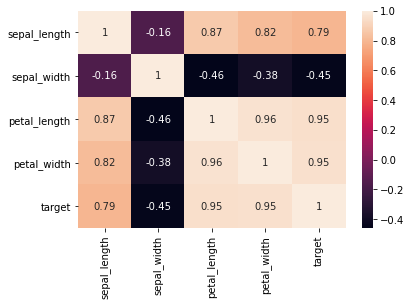

In [6]:
#Can drop columns that are highly correlated to ech other
import seaborn as sns
g = sns.heatmap(df_clean.corr(),annot=True)

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean, train_size=0.7, random_state=1)

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(3,3), activation = 'logistic', solver='sgd', random_state = 1)
weights=[]
train_scores=[]
test_scores=[]
#Remember to shuffle the training data before starting the training process
for i in range(0,500):
    nn.partial_fit(df_clean.drop(columns=['target']).iloc[i%143].to_numpy().reshape(1,-1), [df_clean['target'].iloc[i%143]], classes=np.unique(df_clean['target']))
    weights.append(nn.coefs_[2])
    test_scores.append(nn.score(df_clean.drop(columns=['target']), df_clean['target']))
    #Do same with the test set
    
#you now have the weights, training and testing score at every iteration, can create plots
#you can change the number of iterations based on these plots, to avoid overfitting/underfitting